In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Gene Selection </h1>
<h3 align="center"> Christine Zhang </h3>

----

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

### Import Files and Prep Data

---

In [2]:
ccl_pd = pd.read_csv('datasets_498/masterccleids.csv', header=None, sep =",")
ccl = ccl_pd.as_matrix()
ccl_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,497
0,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286


In [3]:
auc_trans_pd = pd.read_csv('datasets_498/auc.csv', names = ccl[0], sep =",")
auc_trans_pd.head()

,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
0,2.473,2.142,3.38,3.374,3.123,3.779,3.471,2.625,4.677,2.751,...,2.469,3.071,5.351,3.929,3.912,4.913,3.755,1.712,4.61,5.46


In [4]:
auc_pd = auc_trans_pd.transpose()
auc = auc_pd.as_matrix()
auc_pd.head()

,0
3,2.473
7,2.142
10,3.380
15,3.374
16,3.123


In [5]:
geneexp_header_pd = pd.read_csv('datasets_498/geneexp_entrezid.csv', header = None, sep =",")
geneexp_header = geneexp_header_pd.as_matrix()
print geneexp_header_pd.shape
geneexp_header_pd.head()

(18543, 1)


,0
0,100009676
1,10000
2,10001
3,10002
4,10003


In [6]:
geneexp_values_pd = pd.read_csv('datasets_498/geneexp_values.csv', names = ccl[0], sep =",")
geneexp_values = geneexp_values_pd.as_matrix()
print geneexp_values_pd.shape
geneexp_values_pd.set_index(geneexp_header, inplace=True)
geneexp_values_pd.head()

(18543, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
100009676,5.979812,6.079415,5.373842,6.025009,5.444892,5.838828,6.044784,6.110702,5.957453,5.353808,...,5.914540,5.449070,5.509434,6.467376,5.225789,5.056441,5.648520,5.431827,5.229068,5.173519
10000,6.595651,4.521625,6.631749,7.510764,7.544216,7.328450,8.240295,7.339923,7.133862,8.464749,...,8.165614,7.180522,5.359294,6.755762,6.430797,6.566739,6.907085,6.997253,5.847498,4.367224
10001,9.663415,8.845639,10.001350,9.289334,8.715909,8.410834,9.613478,9.227492,8.561879,8.308694,...,8.862251,8.676574,9.098502,9.503690,9.022547,9.840038,9.083045,8.351265,9.277778,9.036209
10002,4.040661,3.768181,3.610522,3.685390,4.173643,3.776557,4.021159,3.547729,3.898854,3.589157,...,3.709869,3.704990,4.277868,4.014417,4.223398,3.986096,4.068887,3.556416,4.645180,4.055940
10003,4.159523,4.044822,4.242035,3.656942,3.663081,4.047007,4.597602,4.252498,3.742255,3.612253,...,3.764959,4.515754,3.751250,3.879979,3.825131,3.752928,3.977737,3.786633,3.665520,3.903062


In [7]:
mutation_header_pd = pd.read_csv('datasets_498/mutation_hugo.csv', header = None, sep = " ")
mutation_header = mutation_header_pd.as_matrix()
print mutation_header_pd.shape
mutation_header_pd.head()

(3235, 1)


,0
0,'AAK1_p._ANY_CODING_MUTATION'
1,'AAK1_p.Q541'
2,'AAK1_p.Q541indel2>Q'
3,'AATK_p._ANY_CODING_MUTATION'
4,'ABCA3_p._ANY_CODING_MUTATION'


In [8]:
mutation_values_pd = pd.read_csv('datasets_498/mutation_value.csv', names = ccl[0], sep =",")
mutation_values = mutation_values_pd.as_matrix()
print mutation_values_pd.shape
mutation_values_pd = mutation_values_pd.astype('float64')
# mutation_values_pd.set_index(mutation_header, inplace=True)
mutation_values_pd.head()

(3235, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
copynum_header_pd = pd.read_csv('datasets_498/copynum_entrezid.csv', header = None, sep =",")
copynum_header = copynum_header_pd.as_matrix()
print copynum_header_pd.shape
copynum_header_pd.head()

(23174, 1)


,0
0,1
1,503538
2,29974
3,2
4,144571


In [10]:
copynum_values_pd = pd.read_csv('datasets_498/copynum_values.csv', names = ccl[0], sep =",")
copynum_values = copynum_values_pd.as_matrix()
print np.shape(copynum_values_pd)
copynum_values_pd.set_index(copynum_header, inplace=True)
copynum_values_pd.head()

(23174, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
1,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
503538,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
29974,-0.4928,-0.0025,-0.0522,-0.3050,0.0436,0.1438,-0.3561,-0.1415,-0.3390,-0.1974,...,-0.1827,-0.1941,0.2785,0.0867,0.1208,0.2966,-0.9912,-0.1204,0.0398,0.1423
2,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203
144571,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203


### Naive Testing

---

In [11]:
exp_cn_trans_pd = pd.concat([copynum_values_pd, geneexp_values_pd])
exp_cn_trans = exp_cn_trans_pd.as_matrix()
print exp_cn_trans_pd.shape
exp_cn_trans_pd.head()

(41717, 498)


,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
1,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
503538,-0.0324,-0.0762,0.0346,0.2934,0.0463,-0.2432,0.0985,-0.1109,0.1655,0.7457,...,-0.2609,-0.3295,-0.5956,-0.5522,-0.0281,-0.1666,0.5718,0.2424,0.1895,0.4302
29974,-0.4928,-0.0025,-0.0522,-0.3050,0.0436,0.1438,-0.3561,-0.1415,-0.3390,-0.1974,...,-0.1827,-0.1941,0.2785,0.0867,0.1208,0.2966,-0.9912,-0.1204,0.0398,0.1423
2,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203
144571,-0.0657,0.4486,-0.3816,0.1603,-0.0112,0.0006,-0.1888,-0.1786,0.2086,-0.8266,...,-0.1841,-0.3723,0.4479,0.0099,0.3918,-0.1186,0.0701,-0.1141,0.9592,0.1203


In [12]:
exp_cn_pd = exp_cn_trans_pd.transpose()
exp_cn = exp_cn_pd.as_matrix()

In [13]:
linreg = LinearRegression()
svr_rbf = SVR(kernel = "rbf")
svr_lin = SVR(kernel = "linear")
rf = RandomForestRegressor()
lasso = linear_model.Lasso(alpha=0.1)
net = linear_model.ElasticNet(alpha=0.1)

# test naive models
def test_model (model):
    clf = model
    clf.fit(x_train_pca, y_train)
    y_pred = clf.predict(x_test_pca)
    r2 = clf.score(x_test_pca, y_test)
    return y_pred, r2

def draw_plot (ax, y_pred, title, y_score):
    y_pred = y_pred.flatten()
    ax.scatter(y_pred, y_test)
    ax.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)))
    ax.set_title("%s r2 accuracy: %s" %(title, round(y_score, 3)))
    ax.set_xlabel("Predicted AUC")
    ax.set_ylabel("Actual AUC")
    return plt

In [14]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()
pca = PCA(n_components=50)
pca.fit(x_train)    
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print "Amount of Variance explained by each component: ", pca.explained_variance_ratio_
print "Total Variance Captured", np.sum(pca.explained_variance_ratio_)

Amount of Variance explained by each component:  [ 0.09721839  0.05087327  0.0288741   0.02571524  0.02219551  0.01830684
  0.01751177  0.01514748  0.01359781  0.01199549  0.01136541  0.01068617
  0.01011781  0.00974528  0.00964189  0.00884208  0.00877465  0.00852463
  0.00828096  0.00789386  0.00761361  0.0075204   0.0072697   0.00686166
  0.00675676  0.00642506  0.00632268  0.00604838  0.00596303  0.00580981
  0.0057167   0.00541837  0.0053352   0.0052251   0.00514068  0.00508889
  0.00494934  0.00488651  0.00474012  0.00461391  0.0045527   0.00447361
  0.00436605  0.00430771  0.0041336   0.00403551  0.00396989  0.00389805
  0.00381626  0.00373664]
Total Variance Captured 0.554304543184


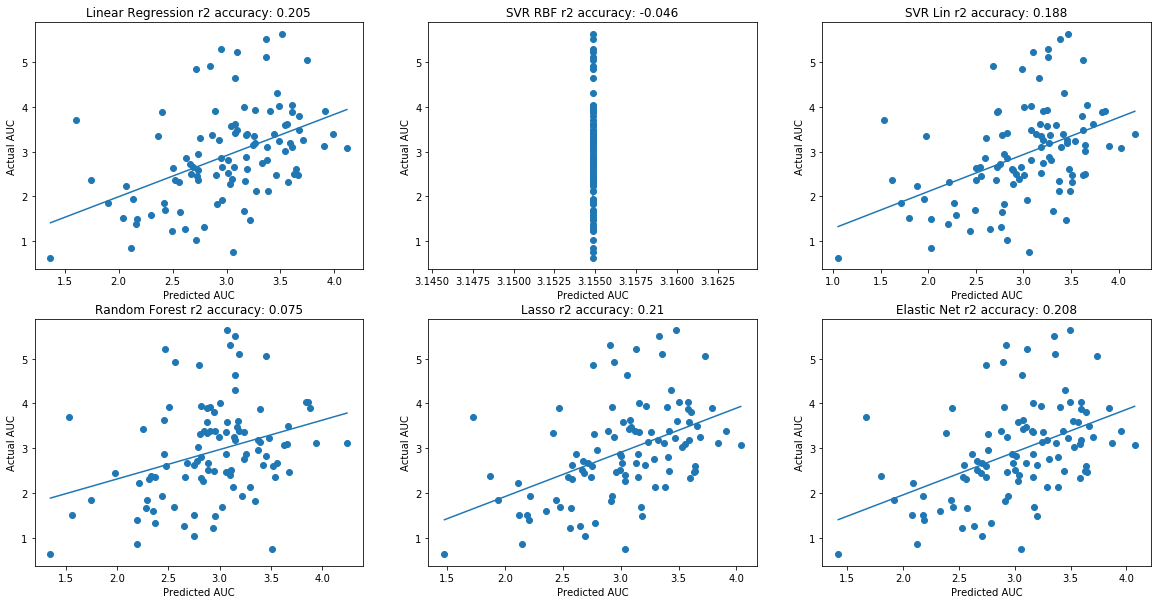

In [15]:
# calculated r_2 values
y_pred_linreg_PCA, r2_linreg_PCA = test_model (linreg)
y_pred_svr_rbf_PCA, r2_svr_rbf_PCA = test_model (svr_rbf)
y_pred_svr_lin_PCA, r2_svr_lin_PCA = test_model (svr_lin)
y_pred_rf_PCA, r2_rf_PCA = test_model (rf)
y_pred_lasso_PCA, r2_lasso_PCA = test_model (lasso)
y_pred_net_PCA, r2_net_PCA = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_PCA, "Linear Regression", r2_linreg_PCA)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_PCA, "SVR RBF", r2_svr_rbf_PCA)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_PCA, "SVR Lin", r2_svr_lin_PCA)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_PCA, "Random Forest", r2_rf_PCA)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_PCA, "Lasso", r2_lasso_PCA)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_PCA, "Elastic Net", r2_net_PCA)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

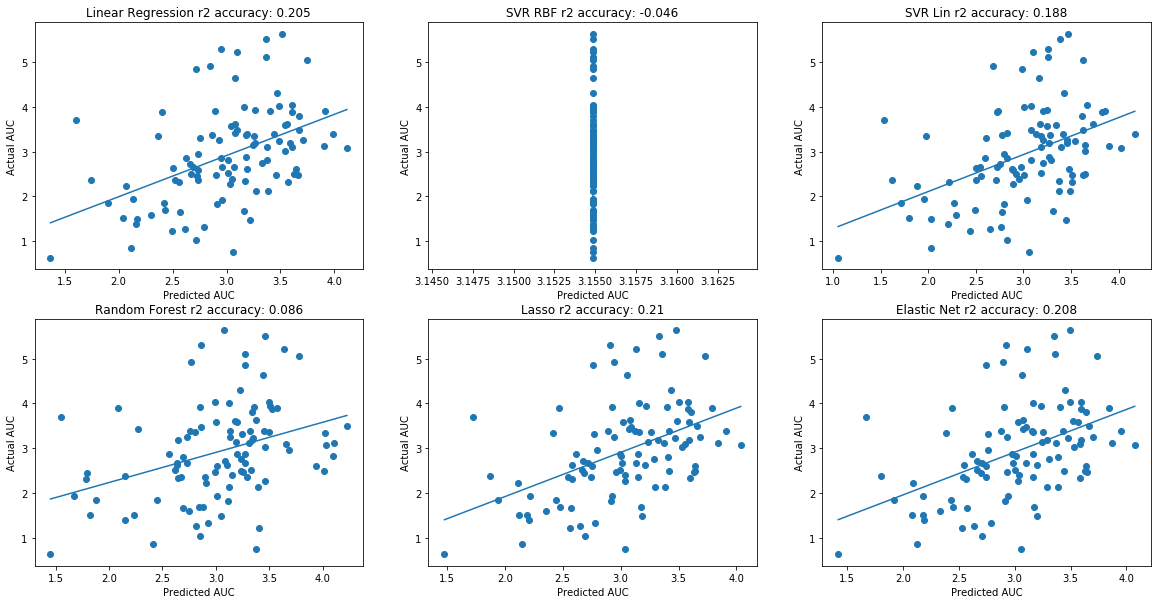

In [17]:
# calculated r_2 values
y_pred_linreg_PCA, r2_linreg_PCA = test_model (linreg)
y_pred_svr_rbf_PCA, r2_svr_rbf_PCA = test_model (svr_rbf)
y_pred_svr_lin_PCA, r2_svr_lin_PCA = test_model (svr_lin)
y_pred_rf_PCA, r2_rf_PCA = test_model (rf)
y_pred_lasso_PCA, r2_lasso_PCA = test_model (lasso)
y_pred_net_PCA, r2_net_PCA = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_PCA, "Linear Regression", r2_linreg_PCA)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_PCA, "SVR RBF", r2_svr_rbf_PCA)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_PCA, "SVR Lin", r2_svr_lin_PCA)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_PCA, "Random Forest", r2_rf_PCA)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_PCA, "Lasso", r2_lasso_PCA)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_PCA, "Elastic Net", r2_net_PCA)

### Intersect with David's Gene List

---

In [18]:
file_name = "datasets_498/gene_lst_pd"
file_object = open(file_name,'r')  
gene_lst_pd = pickle.load(file_object)
entrez_lst = np.array(gene_lst_pd["Entrez_id"])

In [19]:
index_lst = [i for [i] in exp_cn_trans_pd.index]
intersection_values = np.intersect1d(index_lst, entrez_lst)
intersection_auc = np.intersect1d(auc.flatten(), entrez_lst)

In [21]:
exp_cn_intersect_trans_pd = exp_cn_trans_pd.loc[intersection_values,:]
exp_cn_intersect_trans_pd.head()

,3,7,10,15,16,19,21,22,23,25,...,1271,1273,1278,1279,1280,1281,1282,1283,1285,1286
142,0.064700,0.500200,-0.285600,0.32620,0.54400,0.172200,-0.373500,-0.004100,0.225400,0.487800,...,0.791700,-0.295900,0.071300,0.040500,0.043400,-0.108400,0.160700,0.322500,1.28680,0.87010
142,10.455660,12.095980,10.052000,11.81433,10.97239,10.961490,10.508920,10.341620,10.521600,10.651430,...,11.746290,10.966320,10.230520,10.595540,11.094570,10.093600,10.450330,10.933630,10.23711,11.90975
207,-0.012500,-0.080600,-0.153100,-0.34900,-0.86360,-0.720400,0.065900,-0.155000,-0.349200,-0.837000,...,-0.302900,-0.299700,-0.111400,0.017500,0.047700,0.573700,0.183600,-0.505800,0.37730,0.36350
207,8.724103,8.764409,9.049873,9.03498,7.64618,8.502084,8.990039,7.110089,7.861933,8.239972,...,7.710581,7.222625,8.342761,8.857367,8.661978,9.694582,9.064321,8.092056,9.40538,10.30875
317,-0.008300,0.455700,-0.248500,0.26840,0.04150,0.082100,0.026700,-0.123400,0.225600,-0.140100,...,-0.149300,-0.252900,-0.052700,0.036400,0.064600,0.206200,0.155600,-0.000700,-0.06940,0.13750


In [22]:
exp_cn_intersect_pd = exp_cn_intersect_trans_pd.transpose()
exp_cn_intersect = exp_cn_intersect_pd.as_matrix()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(exp_cn_intersect, auc, test_size=0.2, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()
pca = PCA(n_components=50)
pca.fit(x_train)    
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print "Amount of Variance explained by each component: ", pca.explained_variance_ratio_
print "Total Variance Captured", np.sum(pca.explained_variance_ratio_)

Amount of Variance explained by each component:  [ 0.12673612  0.08145182  0.06631468  0.04492885  0.04294762  0.02885218
  0.02764816  0.0257217   0.02399443  0.02309992  0.02146368  0.02097849
  0.0187048   0.01839407  0.01615147  0.01537174  0.01369769  0.0130754
  0.01248631  0.0115982   0.01123443  0.01072639  0.01005073  0.00998993
  0.00962065  0.0088579   0.00800308  0.00773333  0.00763924  0.00745562
  0.00730545  0.00695434  0.00667212  0.00638848  0.0062839   0.00603375
  0.00592298  0.00562623  0.00554448  0.00540119  0.00510118  0.0050417
  0.0049155   0.00478766  0.00458662  0.00451098  0.00439     0.00424802
  0.0041256   0.00408131]
Total Variance Captured 0.852850089572


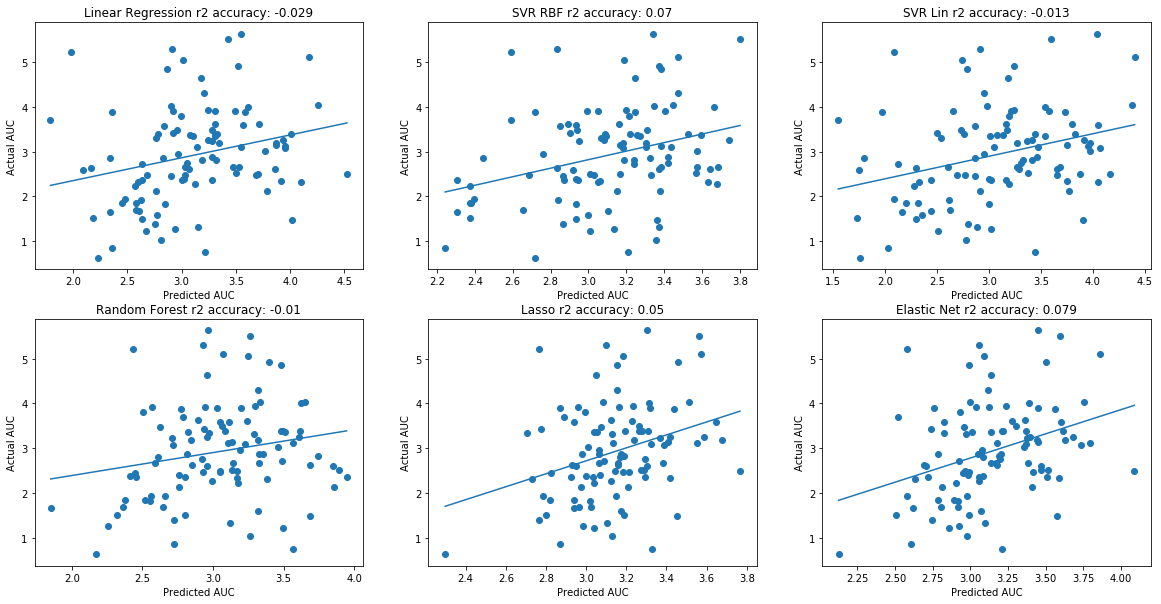

In [24]:
# calculated r_2 values
y_pred_linreg_PCA, r2_linreg_PCA = test_model (linreg)
y_pred_svr_rbf_PCA, r2_svr_rbf_PCA = test_model (svr_rbf)
y_pred_svr_lin_PCA, r2_svr_lin_PCA = test_model (svr_lin)
y_pred_rf_PCA, r2_rf_PCA = test_model (rf)
y_pred_lasso_PCA, r2_lasso_PCA = test_model (lasso)
y_pred_net_PCA, r2_net_PCA = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_PCA, "Linear Regression", r2_linreg_PCA)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_PCA, "SVR RBF", r2_svr_rbf_PCA)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_PCA, "SVR Lin", r2_svr_lin_PCA)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_PCA, "Random Forest", r2_rf_PCA)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_PCA, "Lasso", r2_lasso_PCA)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_PCA, "Elastic Net", r2_net_PCA)

In [25]:
print copynum_values_pd.shape
print geneexp_values_pd.shape
print exp_cn_intersect_trans_pd.shape
print exp_cn_trans_pd.shape

(23174, 498)
(18543, 498)
(216, 498)
(41717, 498)
